# Import Statements

In [ ]:
!pip install keras
!pip install tensorflow
!pip numpy
!pip pandas
!pip matplotlib.pyplot


ERROR: unknown command "numpy"
ERROR: unknown command "pandas"
ERROR: unknown command "matplotlib.pyplot"


In [ ]:
from zipfile import ZipFile
file_name ="/content/brain_tumor_dataset_kaggle.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# 0 - Tumor
# 1 - Normal

OneHotEncoder()


1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor

In [ ]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'../content/brain_tumor_dataset/yes'): #r-read, d-directory, f-file
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"../content/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(139,2)

In [ ]:
print("Data shape:", data.shape)
print("Result shape:", result.shape)


Data shape: (139, 128, 128, 3)
Result shape: (139, 2)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.1, shuffle=True, random_state=0)

In [ ]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (125, 2)
y_test shape: (14, 2)


# Model Building

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) # the number of pixels shifts over the input matrix
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 64)       

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
4/4 [==============================] - 14s 385ms/step - loss: 30.5690 - val_loss: 30.6870
Epoch 2/30
4/4 [==============================] - 0s 82ms/step - loss: 9.0089 - val_loss: 11.6961
Epoch 3/30
4/4 [==============================] - 0s 82ms/step - loss: 3.2237 - val_loss: 17.0948
Epoch 4/30
4/4 [==============================] - 0s 79ms/step - loss: 1.8086 - val_loss: 6.9118
Epoch 5/30
4/4 [==============================] - 0s 82ms/step - loss: 1.0439 - val_loss: 2.4904
Epoch 6/30
4/4 [==============================] - 0s 76ms/step - loss: 1.2211 - val_loss: 3.5656
Epoch 7/30
4/4 [==============================] - 0s 78ms/step - loss: 0.4776 - val_loss: 4.4536
Epoch 8/30
4/4 [==============================] - 0s 76ms/step - loss: 1.1406 - val_loss: 3.6863
Epoch 9/30
4/4 [==============================] - 0s 77ms/step - loss: 0.6065 - val_loss: 3.2749
Epoch 10/30
4/4 [==============================] - 0s 74ms/step - loss: 0.0580 - val_loss: 3.2851
Epoch 11/30
4/4 [======

# Plotting Losses

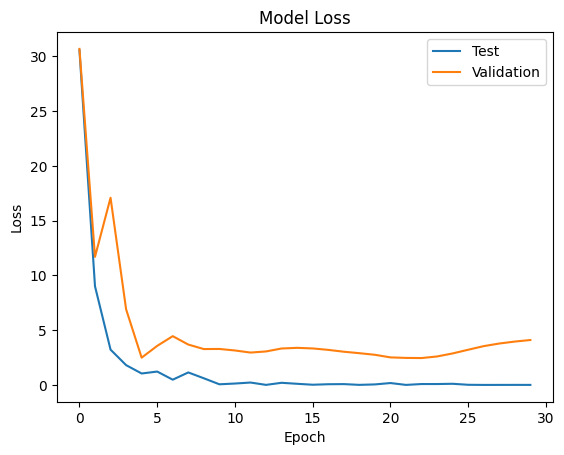

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Just Checking the Model

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

99.56170320510864% Confidence This Is A No, Its not a tumor


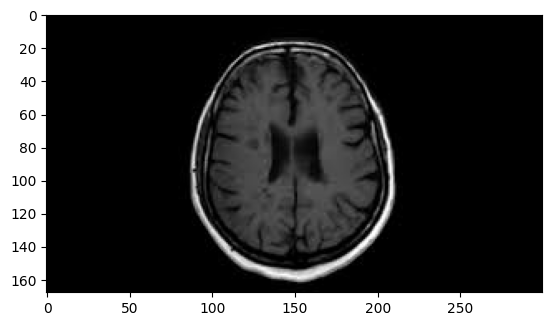

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"../content/brain_tumor_dataset/no/11 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

62.54897117614746% Confidence This Is A No, Its not a tumor


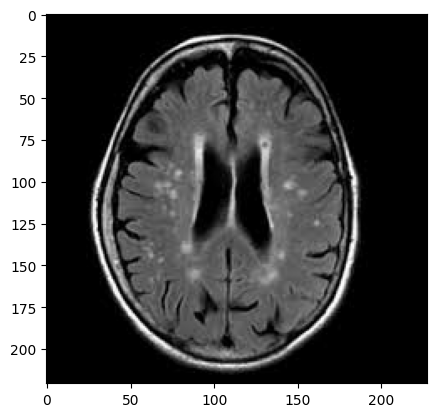

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"../content/brain_tumor_dataset/no/18 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

# Thats It !!

In [ ]:
model.save('my_model.h5')